In [1]:
import numpy as np

from copy import deepcopy
from tqdm import tqdm
import time as t

from Mixers import *

import matplotlib.pyplot as plt

---
##### Global settings

In [2]:
np.set_printoptions(precision=2)
plt.rcParams['figure.dpi'] = 250

---

##### Parameters

In [3]:
time = 50000  # number of iterations
step = 100     # how often do we save a picture

wait = 10      # time spent between pictures given in ms

transition = Swirl(500, alternating=False)
transition_type = 'Swirl'

---

##### Setting the initial distribution

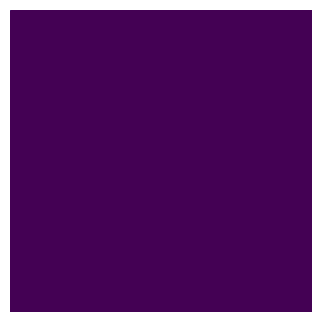

In [4]:
#di = (np.random.rand(n,n) < density_init).astype(float)
di = np.zeros(transition.shape[1:])
di[0,0] = 1
init = Distribution(di)

# printing so you have aesthetic options
init.snap(dpi=100)

##### Simulation & gif

Every figure is closed asap to save resources.

In [5]:
# we want the same init for every strategy
distribution = init.copy()

name = f'{transition_type}_n{transition.shape[1]}_t{time}_s{step}'
folder_name = f'.{name}'
!mkdir $folder_name

# we save extra images of the init, so it will be visible in the gif
[distribution.snap(mode='save', file=f'{folder_name}/{name}_000000_{j}.png') for j in range(4)]

# main iteration
for i in tqdm(np.arange(step,time,step), ncols=50):
    # advancing
    [distribution.update(transition) for _ in range(step)]

    # saving the current state
    distribution.snap(mode='save', file=f'{folder_name}/{name}_{i:06}.png')  # vmax=1/init.size

pics = f'{folder_name}/*.png'
gif = f'gifs/{name}.gif'

now = t.time()
!convert -delay 10 -loop 0 $pics $gif
gif_run_time = t.time() - now
print(f'gif done | {gif_run_time // 60:02.0f}:{gif_run_time % 60:02.0f}')

!rm -r $folder_name

100%|███████████| 499/499 [29:41<00:00,  3.57s/it]


gif done | 02:11


---
---
---